In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from scipy import sparse
from time import time
import pandas as pd
import networkx as nx
import graph_tool as gt
import matplotlib.pyplot as plt
import seaborn as sns
import json
import regex as re
from pathlib import Path
from copy import deepcopy
from importlib import reload
from collections import Counter, defaultdict

In [3]:
import analysis
import files
import grouping

In [4]:
reload(files)

<module 'files' from '/home/ruskirin/Documents/Projects/Studies/reddit-assort-analysis/files.py'>

In [5]:
plt.rcParams.update({'axes.titlesize': 'large'})
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [ ]:
paths = files.get_network_paths()
paths

In [ ]:
groups = files.get_groups()
groups.keys()

In [ ]:
m,a,c = grouping.get_missing_added_changed(set(paths.keys()), groups)

In [ ]:
groups_clean = grouping.remove_subreddits(groups, a)
groups_clean = grouping.correct_subreddits_spelling(groups_clean, c)
groups_clean

In [ ]:
PATH_GROUPS_CLEAN = files.PATH_DATA/'subreddits-grouped-clean.json'

with open(PATH_GROUPS_CLEAN, 'w') as f:
    json.dump(groups_clean, f)

### Getting Network Info

In [ ]:
groups = files.get_network_paths_grouped(PATH_GROUPS_CLEAN)
groups

<code>net_desc = dict()
for g, sr in groups.items():
    net_desc[g] = dict()
    for n, p in sr:
        _, net = analysis.nx_digraph_from_path(n, p)
        net_desc[g][n] = (net.number_of_nodes(), net.number_of_edges())</code>

In [ ]:
with open(PATH_GROUPS_CLEAN.parent/'net-node-edge-counts.json', 'r') as f:
    net_desc = json.load(f)

In [ ]:
s = dict()
for g, sr in net_desc.items():
    s[g] = dict(sorted(sr.items(), key=lambda x: x[1][0]))

In [ ]:
print(s)

In [12]:
net_desc

{'fashion': {'malefashionadvice': [56531, 105290],
  'frugalmalefashion': [17700, 28342],
  'caps': [1242, 2449],
  'malehairadvice': [7584, 9514],
  'AsianBeauty': [2707, 10211],
  'TeenMFA': [2029, 6529],
  'MaleFashionMarket': [1572, 1899],
  'ABraThatFits': [4763, 10523],
  'entwives': [1535, 2468],
  'AustralianMakeup': [1057, 2626],
  'asianamerican': [1565, 2926],
  'tightdresses': [1566, 1405],
  'streetwear': [6568, 14301],
  'FancyFollicles': [9891, 14331],
  'curvy': [2418, 2260],
  'MakeupAddiction': [41235, 100380],
  'malegrooming': [2783, 3197],
  'BeardPorn': [1426, 1649],
  'SkincareAddiction': [20685, 40092],
  'MakeupAddicts': [3403, 6296],
  'piercing': [4173, 6857],
  'BeautyBoxes': [2330, 4453],
  'Sneakers': [10741, 23014],
  'TF2fashionadvice': [2147, 3368],
  'burstingout': [1460, 1326],
  'supremeclothing': [3919, 10731],
  'Hair': [2887, 3618],
  'braswap': [1022, 1658],
  'femalefashionadvice': [13106, 29648],
  'malefashion': [2235, 3313]},
 'market': {'sma

In [13]:
group_sizes = {g: len(sr) for g, sr in groups.items()}
group_sizes

{'fashion': 30,
 'market': 54,
 'media': 118,
 'sports': 135,
 'medical': 36,
 'politics': 72,
 'professional': 101,
 'sexual': 116,
 'other': 197,
 'science': 59,
 'violent': 45,
 'health_fitness': 49,
 'travel': 82,
 'philosophy': 29,
 'books_comics': 44,
 'personal': 113,
 'tech': 122,
 'news': 62,
 'vehicles': 59,
 'music': 76,
 'religion': 29,
 'video_games': 229,
 'food': 42,
 'education': 50,
 'geography': 97,
 'comedy': 88,
 'q_and_a': 75,
 'hobbies': 204,
 'animals': 43,
 'stories': 47}

In [14]:
groups_sum = sum(group_sizes.values())
groups_sum

2503

In [15]:
num_cat = len(groups.keys())
num_cat

30

<IPython.core.display.Javascript object>


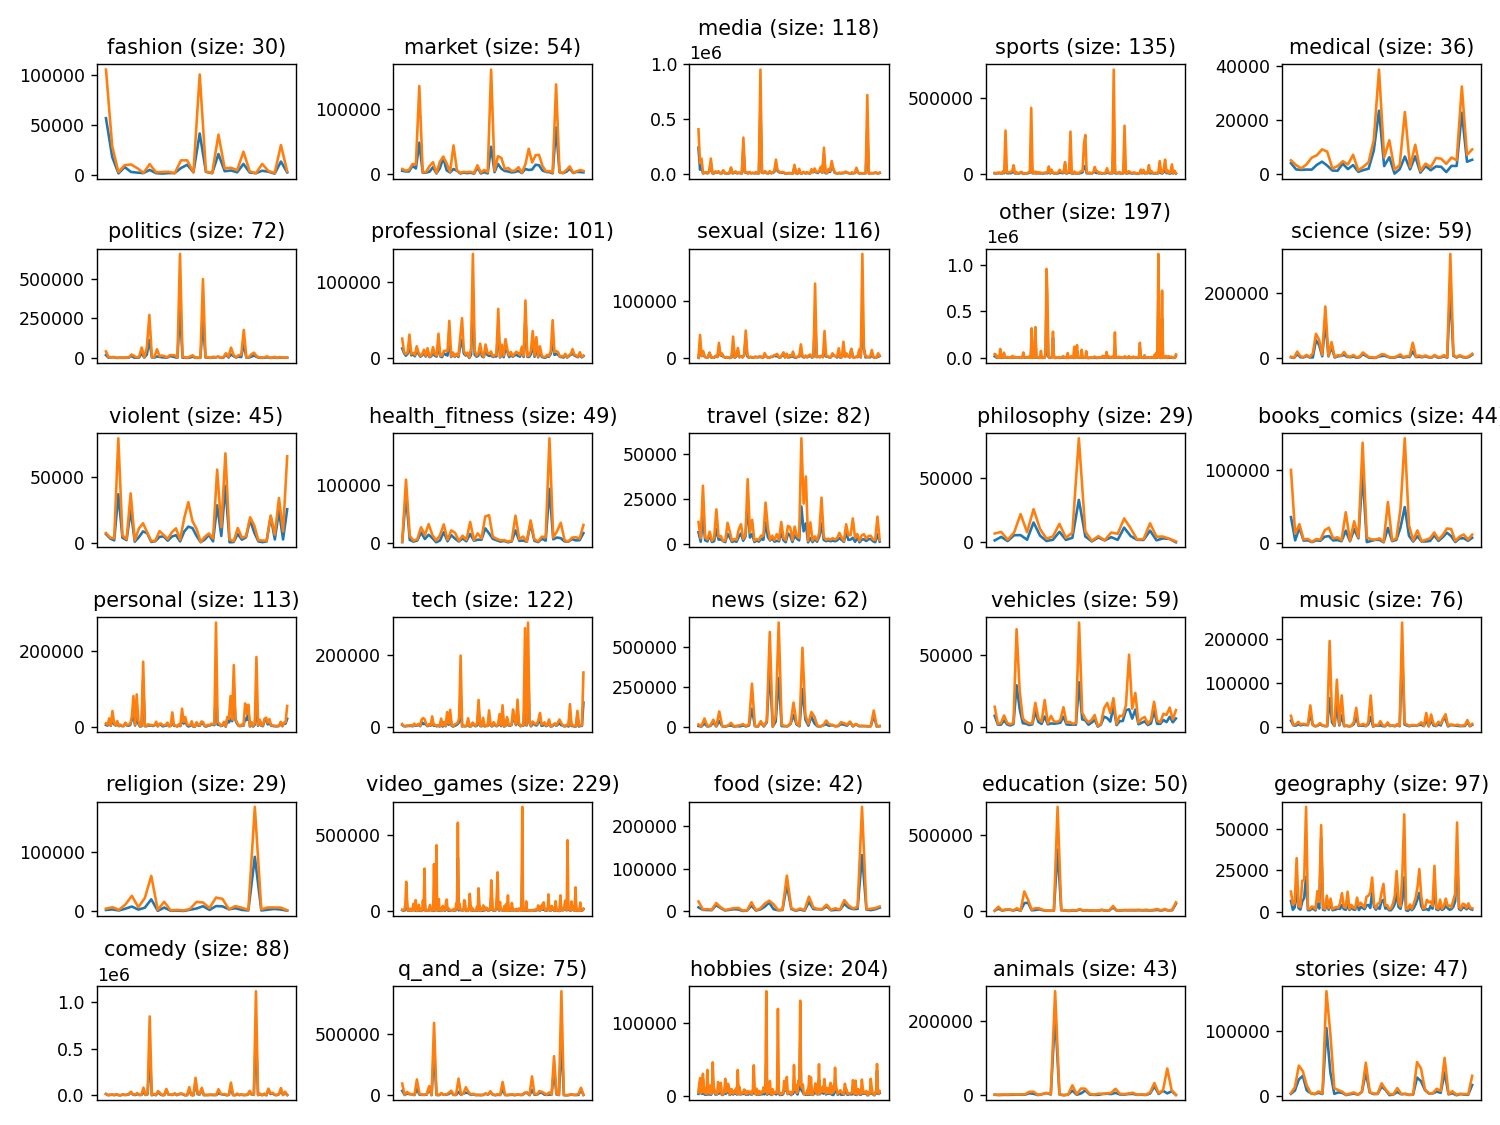

In [19]:
fig = plt.figure(figsize=(12,9))

In [20]:
plt.clf()
for i, (g, sr) in enumerate(net_desc.items()):    
    ax = fig.add_subplot(6,5,i+1)
    
    ax.set_title(f'{g} (size: {len(sr)})')
    ax.set_xticks([])
    ax.set_xlabel('')
    ax.plot(sr.keys(), [d[0] for d in sr.values()])
    ax.plot(sr.keys(), [d[1] for d in sr.values()])

fig.tight_layout()
plt.show()

In [35]:
plt.savefig(files.PATH_DATA/'sample.png')

In [26]:
d = {'a': 1, 'b': 0, 'c': 4}
print(sorted(d))

In [19]:
for i, (g, sr) in enumerate(net_desc.items()):    
    row = int(i / 6)
    col = i % 6 + 1
    
    axs[row][col].set_title(g)
    axs[row][col].plot(sr.keys(), [d[0] for d in sr.values()])
    axs[row][col].plot(sr.keys(), [d[1] for d in sr.values()])

fig.tight_layout()
plt.show()

### Getting Random Samples

Every subreddit found in 'other' category is also present in at least 1 other group, so for analysis purposes will avoid running methods on 'other' as the subreddits have no common correlation.

In [15]:
seed = 1000
np.random.seed(seed=seed)

In [ ]:
groups_samples = {g: np.random.choice(groups)}

Categories: 30


<IPython.core.display.Javascript object>


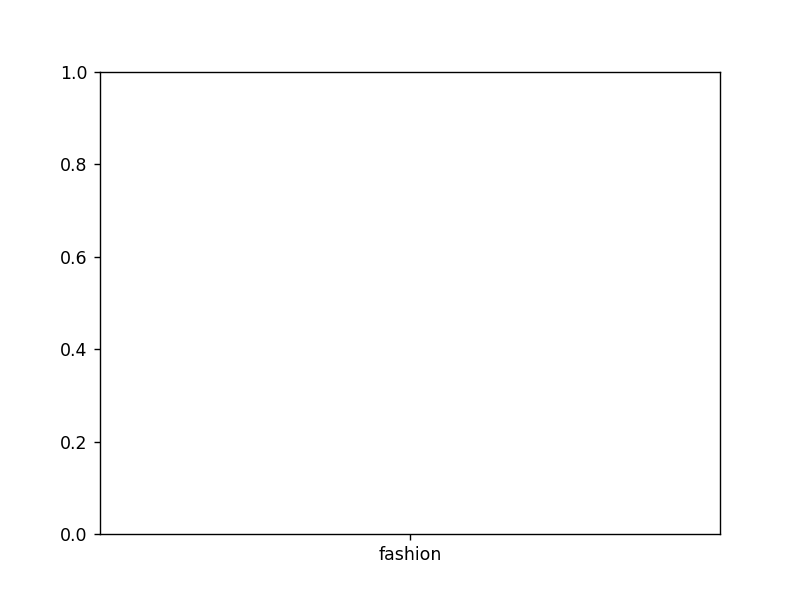

ValueError: x and y must have same first dimension, but have shapes (30,) and (1,)

In [20]:
print(f'Categories: {len(net_desc.keys())}')
plt.plot(net_desc.keys(), len(net_desc.values()))

In [29]:
fig = plt.Figure(figsize=(9,9))

In [ ]:
for g, sr in net_desc.items():
    ax = fig.add_subplot()